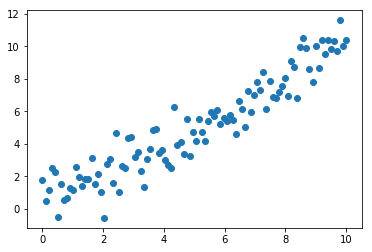

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # pour toujours reproduire le meme dataset
 
n_samples = 100 # nombre d'echantillons a générer
x = np.linspace(0, 10, n_samples).reshape((n_samples, 1))
y = x + np.random.randn(n_samples, 1)
 
 
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.show()

In [2]:
# ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
 
# création d'un vecteur parametre theta
theta = np.random.randn(2, 1)
print(theta)

(100, 2)
[[ 1.8831507 ]
 [-1.34775906]]


In [3]:
def model(X, theta):
    return X.dot(theta)
 
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cost_history

In [4]:
# Example de test :
print(cost_function(X, y, theta)) # pas d'erreur, retourne float, ~ 1000

8.571212944952592


[[0.99101415]
 [0.07049054]]


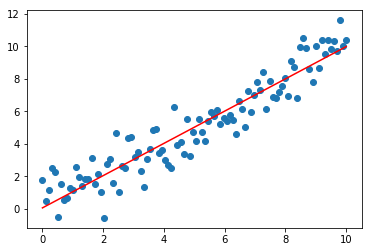

In [5]:
n_iterations = 1000
learning_rate = 0.01
 
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) # voici les parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

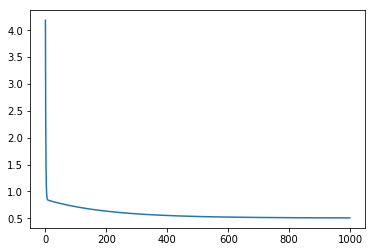

In [6]:
plt.plot(range(n_iterations), cost_history)
plt.show()